# ¿Cómo afectó el Covid 19 a la educación (básica y secundaria) en Ecuador?

![Como afecto el covid a la educacion](https://i.imgur.com/6thn6w2.png)

In [1]:
# Load modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
# Load data
DATA_P_DIR = os.path.join(os.getcwd(), os.pardir, 'data', 'processed')

positives = pd.read_pickle(os.path.join(DATA_P_DIR, 'positives.pkl'))
vaccines = pd.read_pickle(os.path.join(DATA_P_DIR, 'vaccines.pkl'))
deaths = pd.read_pickle(os.path.join(DATA_P_DIR, 'deaths.pkl'))
closures_education = pd.read_pickle(os.path.join(DATA_P_DIR, 'closures_education.pkl'))
education_ec = pd.read_pickle(os.path.join(DATA_P_DIR, 'education_ec.pkl'))
students = pd.read_pickle(os.path.join(DATA_P_DIR, 'students.pkl'))

## Vista general a la evolución del Covid-19 y la respuesta de los centros educativos

Durante la pandemia, este es el total de **casos positivos** y **fallecimientos** en Ecuador hasta enero de 2022:

In [3]:
print(f'Positivos: {positives["acumulados"].max()}\nFallecimientos: {deaths["accumulated"].max()}')

Positivos: 562723
Fallecimientos: 33686


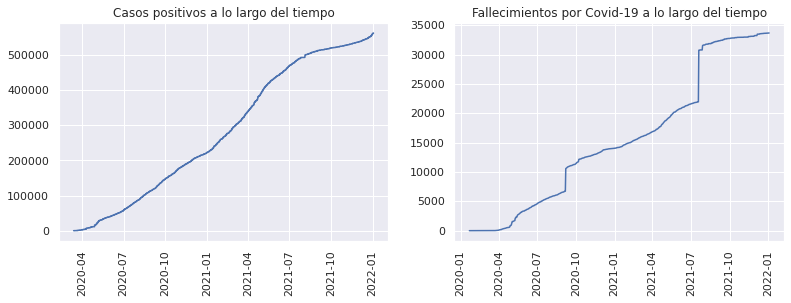

In [4]:
sns.set_theme()
fig, ax = plt.subplots(1, 2, figsize=[13, 4])
ax[0].plot(positives.created_at, positives.acumulados)
ax[0].set_title('Casos positivos a lo largo del tiempo')
ax[1].plot(deaths.date, deaths.accumulated)
ax[1].set_title('Fallecimientos por Covid-19 a lo largo del tiempo')
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=90)
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=90)
plt.show()

Debido a lo anterior, se tuvo que tomar medidas al respecto y por varios meses se entró en cuarentena, cerrando todo tipo de establecimientos, entre ellos, los educativos. A la fecha actual, diciembre de 2021, se permite la circulación normal con distanciamiento social, sin embargo, a las unidades educativas aún no se les permite abrir con normalidad, sino que tienen que hacerlo de manera parcial.

En estos gráficos se muestra la evolución de las aperturas, cierres y aperturas parciales de los centros educativos durante la pandemia y su relación con los casos postivos diarios:

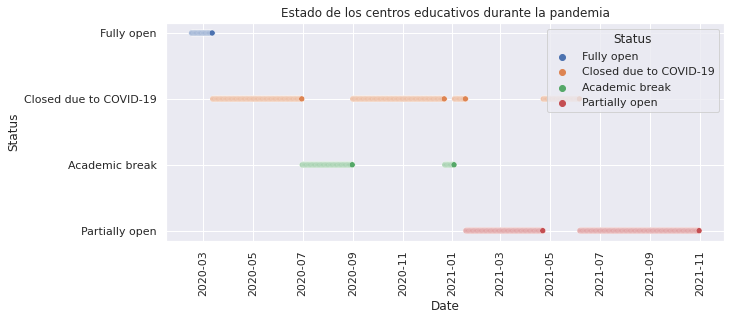

In [27]:
plt.figure(figsize=[4
0, 4])
sns.scatterplot(data=closures_education, x='Date', y='Status', hue='Status')
plt.title('Estado de los centros educativos durante la pandemia')
plt.xticks(rotation=90)
plt.show()

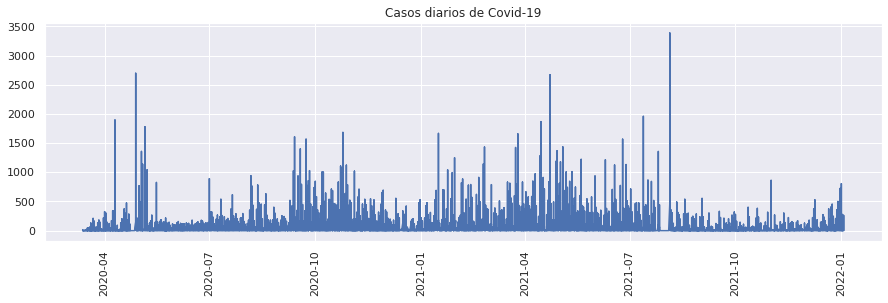

In [6]:
plt.figure(figsize=[15,4])
plt.plot(positives.created_at, positives.nuevas)
plt.title('Casos diarios de Covid-19')
plt.xticks(rotation=90)
plt.show()

En las gráficas se puede evidenciar que cada que hay un pico alto de contagios, se cierra por completo los centros educativos. Esto hace que los contagios diarios disminuyan, pero cuando se vuelven a abrir, los contagios vuelven a elevarse (un claro ejemplo es enero de 2021). Por lo que fue acertado el cierre total por parte de las autoridades.

También se puede apreciar como, a partir de aproximadamente julio del 2021, la cantidad de personas vacunadas empezó incrementarse considerablemente, esto permitió que los centros educativos hayan estado parcialmente abiertos desde entonces (también se nota en el número de casos positivos por día).

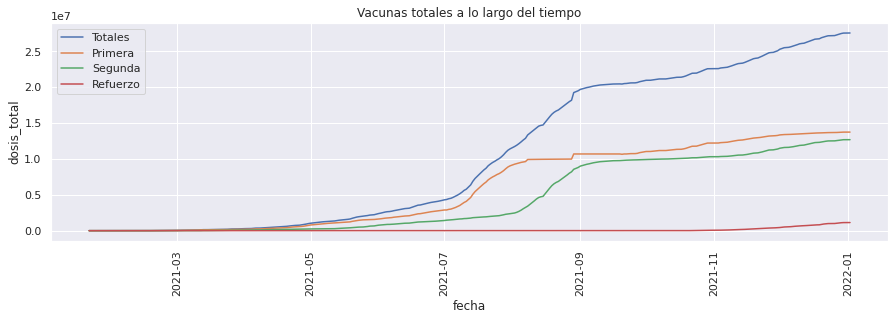

In [7]:
plt.figure(figsize=[15, 4])
sns.lineplot(data=vaccines, x='fecha', y='dosis_total',  label='Totales')
sns.lineplot(data=vaccines, x='fecha', y='primera_dosis', label='Primera')
sns.lineplot(data=vaccines, x='fecha', y='segunda_dosis', label='Segunda')
sns.lineplot(data=vaccines, x='fecha', y='refuerzo', label='Refuerzo')
plt.title('Vacunas totales a lo largo del tiempo')
plt.xticks(rotation=90)
plt.show()

Desde el inicio del confinamiento, más del **45% del tiempo**, las escuelas y colegios han estado totalmente cerrados y un **38% del tiempo** han estado parcialmente abiertos. Esto debió afectar a los estudiantes.

## Análisis del progreso de los estudiantes en Ecuador

A continuación, se puede observar la evolución de los estudiantes aprobados, reprobados, y que abandonaron la escuela entre 2009 y 2021:

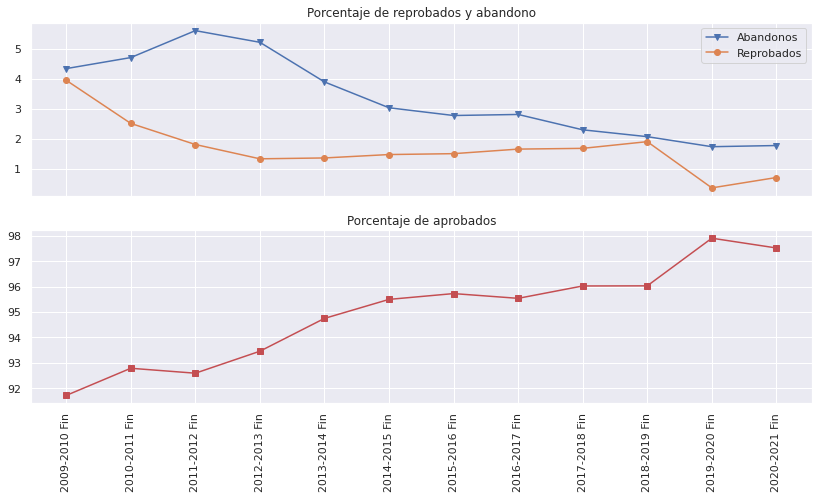

In [8]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=[14,7])
ax[0].plot(students.index, students.p_dropout, marker='v', label='Abandonos')
ax[0].plot(students.index, students.p_reproved, marker='o', label='Reprobados')
ax[0].legend()
ax[0].set_title('Porcentaje de reprobados y abandono')
ax[1].plot(students.index, students.p_promoted, marker='s', c='r')
ax[1].set_title('Porcentaje de aprobados')

plt.xticks(rotation=90)
plt.show()

Históricamente, Ecuador mejorado progresivamente el acceso a la educación, por ello hay un progreso positivo con relación entre estudiantes aprobados vs. estudiantes que abandonan la escuela. No obstante, entre el periodo `2019-2020` y `2020-2021` (correspondiente a la pandemia) se proponen 3 hipótesis:
1. Hay una tendecia positiva de mayor número de estudiante aprobados, pero para `2019-2020` estos indicadores subieron abruptamente. Esto puede ser explicado debido a que los centros educativos cerraron al inicio de la pandemia y no hubo soluciones como clases virtuales para la _mayoría de establecimientos_. Seguidamente decidieron dar por terminado el año lectivo aprobando a todos los estudiantes. Para `2020-2021`, el número de aprobados vuelve a bajar, aunque sigue estando por encima de la tendencia de años anteriores. ¿Por qué se presenta este fenómeno? Ahora sí hubo clases virtuales y semipresenciales durante todo el año, pero, ¿cuál es la razón de que siga siendo mayor que en años anteriores? Esto se podrá apreciar en el siguiente punto. 👇
2. En la gráfica de reprobados, desde `2012` hasta `2019` cada año obtuvo un mayor porcentaje de reprobados, pero entre `2020 y 2021`, se rompe la tendencia y ahora los estudiantes reprueban mucho menos (exceptuando `2019-2020`, que por defecto aprobaron la mayoría debido al cierre), un `1.20%` menos de reprobados en `2021` si se compara con `2019`. La hipótesis es que para aprobar se requiere sacar una nota mínima en exámenes y deberes; con las clases virtuales es muy sencillo comenter plagio en ambos items y aprobar. Faltan datos de las notas históricas de los estudiantes para poder comprobar o descartar esta hipótesis.
3. El punto de foco principal es el de abandonos, hay más abandonos que reprobados. Desde `2011` existe una fuerte tendencia de estudiantes que abandonan cada vez menos. En el año `2020` parece que la tendencia sigue por lo de _todos aprobados_, pero para `2021`, cuando volvimos a la "normalidad", el porcentaje de abandonos incrementó, lo que significa que muchos estudiantes de escuelas y colegios dejaron sus estudios durante la pandemia.

El resto del análisis estará enfocado en el tercer punto. Se busca entender qué grupo social conforma ese incremento de abandonos.

## Grupos sociales afectados por la pandemia

Primero veamos cuántos estudiantes abandonaron los estudios en 2020 y en 2021.

In [9]:
students_es = students.iloc[-2:].rename(columns={'dropout': 'Número de abandonos', 'p_dropout': 'Porcentaje de abandonos'})
print(students_es[['Número de abandonos', 'Porcentaje de abandonos']])

               Número de abandonos  Porcentaje de abandonos
Periodo                                                    
2019-2020 Fin                75295                 1.732186
2020-2021 Fin                75566                 1.771261


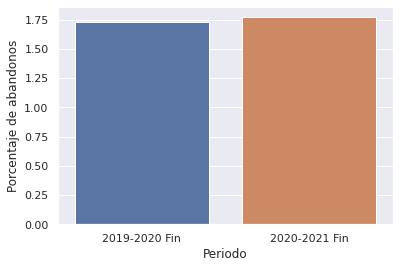

In [10]:
sns.barplot(data=students_es, x=students_es.index, y='Porcentaje de abandonos')
plt.show()

Ahora se procederá a enfocar lo que pasó en 2020 y 2021 en varias categorías:
- Sostenimiendo del centro educativo (particular o no).
- Área urbana y rural.
- Jornada (matutina o no).

### Tipo de sotenimiento del centro educativo

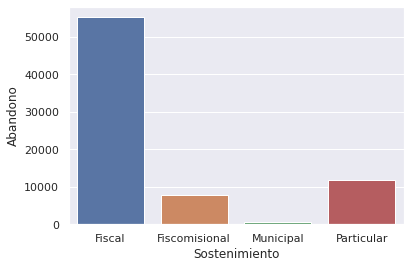

In [11]:
# 2020
education_2020 = education_ec.query('Periodo == "2019-2020 Fin"')
sostenimiento_2020 = education_2020.groupby('Sostenimiento')[['Total_estudiantes', 'Abandono']].sum()
sostenimiento_2020['Porcentaje_abandono'] = round(sostenimiento_2020['Abandono'] / sostenimiento_2020['Total_estudiantes'] * 100, 2)
# Plot
sns.barplot(data=sostenimiento_2020, x=sostenimiento_2020.index, y='Abandono')
plt.show()

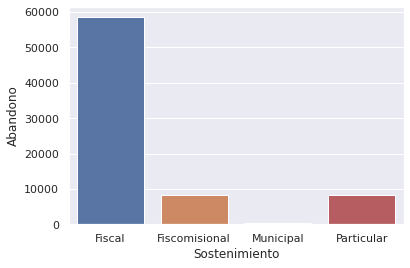

In [12]:
# 2021
education_2021 = education_ec.query('Periodo == "2020-2021 Fin"')
sostenimiento_2021 = education_2021.groupby('Sostenimiento')[['Total_estudiantes', 'Abandono']].sum()
sostenimiento_2021['Porcentaje_abandono'] = round(sostenimiento_2021['Abandono'] / sostenimiento_2021['Total_estudiantes'] * 100, 2)
# Plot
sns.barplot(data=sostenimiento_2021, x=sostenimiento_2021.index, y='Abandono')
plt.show()

In [13]:
# Comparar 2020 con 2021
no_fiscal = sostenimiento_2021.iloc[[1,3],0].sum() - sostenimiento_2020.iloc[[1,3],0].sum()
fiscal = sostenimiento_2021.iloc[[0,2],0].sum() - sostenimiento_2020.iloc[[0,2],0].sum()
print(f'Abandonos centros no fiscales: {no_fiscal}\nAumento centros fiscales: {fiscal}')

Abandonos centros no fiscales: -159024
Aumento centros fiscales: 78429


- Entre 2020 y 2021, `159.024` estudiantes dejaron las escuelas particulares y fiscomisionales. Esto puede ser explicado debido a que sus padres perdieron su capacidad adquisitiva durante la pandemia y pasaron de clase media alta a clase media o media baja.
- Además, hubo un aumento de `78.429` estudiantes en instituciones fiscales.
- En 2021 `58.538 (1.71%)` estudiantes abandonaron las escuelas fiscales, mientras que para el resto de instituciones el número permanece por debajo de `~8.400`. Esto denota que los estudiantes que abandonan mayormente podrían estar en una clase media baja.

### Áreas urbanas y rurales

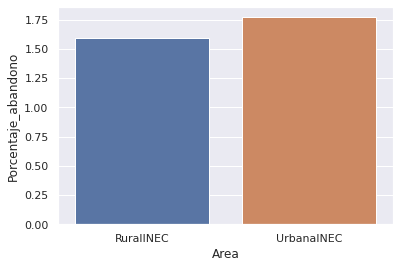

In [14]:
# 2020
area_2020 = education_2020.groupby('Area')[['Total_estudiantes', 'Abandono']].sum()
area_2020['Porcentaje_abandono'] = round(area_2020['Abandono'] / area_2020['Total_estudiantes'] * 100, 2)
# Plot
sns.barplot(data=area_2020, x=area_2020.index, y='Porcentaje_abandono')
plt.show()

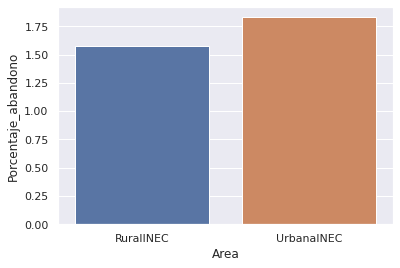

In [15]:
# 2021
area_2021 = education_2021.groupby('Area')[['Total_estudiantes', 'Abandono']].sum()
area_2021['Porcentaje_abandono'] = round(area_2021['Abandono'] / area_2021['Total_estudiantes'] * 100, 2)
# Plot
sns.barplot(data=area_2021, x=area_2021.index, y='Porcentaje_abandono')
plt.show()

La crisis afectó relativamente igual a los estudiantes de la ciudad y el campo. Hay solo una pequeña diferencia de aproximadamente el `~0.2%` de mayor impacto en la ciudad.

### Tipo de jornada



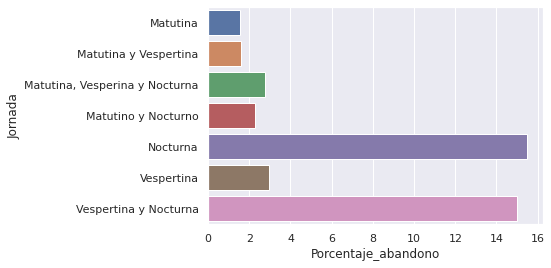

In [16]:
# 2020
jornada_2020 = education_2020.groupby('Jornada')[['Total_estudiantes', 'Abandono']].sum()
jornada_2020['Porcentaje_abandono'] = round(jornada_2020['Abandono'] / jornada_2020['Total_estudiantes'] * 100, 2)
# Plot
sns.barplot(data=jornada_2020, y=jornada_2020.index, x='Porcentaje_abandono')
plt.show()

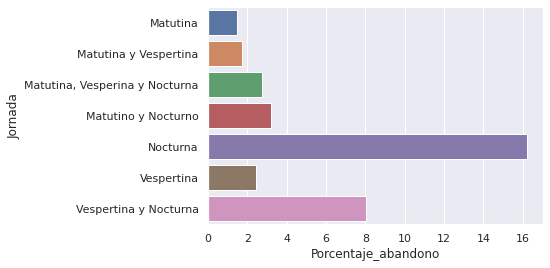

In [17]:
# 2021
jornada_2021 = education_2021.groupby('Jornada')[['Total_estudiantes', 'Abandono']].sum()
jornada_2021['Porcentaje_abandono'] = round(jornada_2021['Abandono'] / jornada_2021['Total_estudiantes'] * 100, 2)
# Plot
sns.barplot(data=jornada_2021, y=jornada_2021.index, x='Porcentaje_abandono')
plt.show()

En Ecuador es común que los estudiantes vespertinos y nocturnos estén en este tipo de jornada porque trabajan el resto del tiempo. Los datos muestran que este es justamente el grupo más afectado. Mientras que el porcentaje de abandono en la jornada matutina se mantiene al rededor de `~1.50%`, para el resto de jornadas este porcentaje siempre es mayor e incluso llega a un máximo de `16.21%` en la jornada nocturna de 2021.

## Conclusiones:

- La respuesta del estado al cerrar los establecimientos educativos fue correcta para contener el virus, ya que esto ayudó a que disminuyan los contagios diarios, y por ende, los fallecimientos.
- Un **1.20% de estudiantes** que normalmente no aprobarían el año lectivo, ahora lo hicieron durante la modalidad virtual.
- El último año, en gran parte debido a la pandemia, **75.566 niños y jóvenes** abandonaron sus estudios.
- **159.024 estudiantes** migraron de una educación particular/fiscomisional a una fiscal como resultado de la crisis.
- Los estudiantes con mayor número de abandonos, pertenecían a las jornadas _vespertinas y/o nocturnas_, con un pico de abandono del **16.21%** para los estudiantes de jornada nocturna. Como comparativa, el porcentaje de abandono de estudiantes de la jornada matutina es de **1.45%**.
- Estudiantes del área urbana y rural fueron afectados casi por igual.
- Estos datos permiten concluir que la clase media baja es la más afectada.

## Action-items

- El Gobierno podría realizar apoyos económicos y sociales con un enfoque mayor a los estudiantes de jornadas vespertinas y nocturnas.
- Llevar un seguimiento y foco especial para estos grupos, ya que podrían estancarse en una clase baja en los próximos años y tener una afectación a nivel de país.
- También se podría aumentar el presuesto para las escuelas fiscomisionales y de esta manera evitar que haya una migración masiva de instituciones particulares a fiscales.
- Evitar seguir reduciendo el presupuesto general para la educación (se hizo ya varias veces).
- Contar con planes de contingencia para eventos de magnitud global como la pandemia del Covid 19, generaría un mayor marco de acción y prevención para reducir daños colaterales.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e7b048df-fc9b-4970-aa88-df153b270a6f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>